C:\Users\karti\AppData\Local\Temp\ipykernel_34440\3058372308.py:14: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metro_systems_final.csv')


First few rows of the dataset:
           City    Country                      Name  Stations  Lines  \
0       Algiers    Algeria             Algiers Metro      19.0    1.0   
1  Buenos Aires  Argentina  Buenos Aires Underground      78.0    7.0   
2       Yerevan    Armenia             Yerevan Metro      10.0    1.0   
3        Sydney  Australia              Sydney Metro      21.0    1.0   
4        Vienna    Austria             Vienna U-Bahn      98.0    5.0   

   System length  Annual Average Ridership  Population  Population Density  
0           18.5                      46.0        4.51             12424.0  
1           56.7                     236.0       13.50             13680.0  
2           12.1                      23.3        1.09              4800.0  
3           52.0                      39.7        5.56               441.0  
4           83.3                     352.4        2.00              4000.0  
✅ Model saved to 'model.pkl'

Model Evaluation:
Mean Squared Error: 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


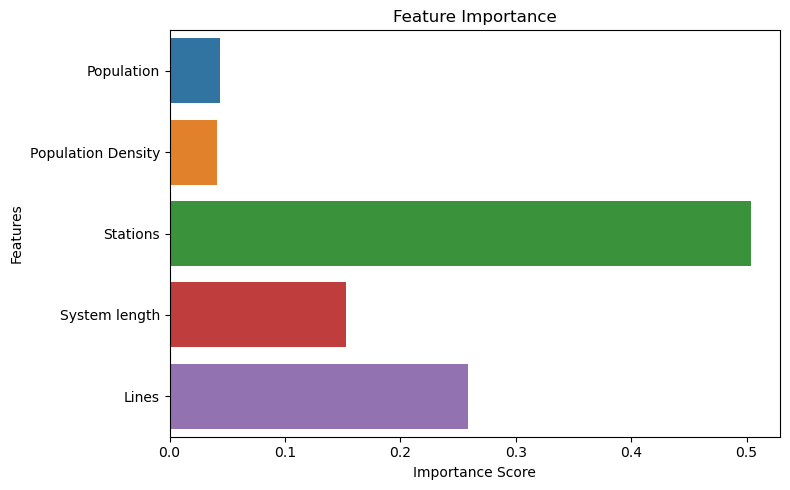

FloatText(value=10.0, description='Population (millions):')

FloatText(value=5000.0, description='Density (people/sq km):')

IntText(value=50, description='Stations:')

FloatText(value=60.0, description='System Length (km):')

IntText(value=3, description='Number of Lines:')

Button(description='Predict Ridership', style=ButtonStyle())

In [6]:
# Metro Ridership Prediction Model using Random Forest

# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# 2. Load the dataset
df = pd.read_csv('metro_systems_final.csv')

# 3. Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 4. Display first few rows
print("First few rows of the dataset:")
print(df.head())

# 5. Define feature columns and target variable
feature_columns = ['Population', 'Population Density', 'Stations', 'System length', 'Lines']
target_column = 'Annual Average Ridership'

X = df[feature_columns]
y = df[target_column]

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

import joblib

# Save the trained model to a file
joblib.dump(model, 'model.pkl')
print("✅ Model saved to 'model.pkl'")


# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 10. Visualize feature importance
importances = model.feature_importances_
feature_names = feature_columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np

# Define function to predict ridership with feature names
def predict_ridership(population, density, stations, system_length, lines):
    # Make sure the feature names match exactly with what was used during training
    feature_columns = ['Population', 'Population Density', 'Stations', 'System length', 'Lines']
    
    # Prepare input data in the correct format
    new_data = pd.DataFrame([[population, density, stations, system_length, lines]], columns=feature_columns)
    
    # Predict using the trained model
    predicted_ridership = model.predict(new_data)
    
    # Display the result
    print(f"Predicted Annual Average Ridership: {predicted_ridership[0]:.2f} million")

# Create widgets for input
population_widget = widgets.FloatText(value=10.0, description='Population (millions):')
density_widget = widgets.FloatText(value=5000.0, description='Density (people/sq km):')
stations_widget = widgets.IntText(value=50, description='Stations:')
system_length_widget = widgets.FloatText(value=60.0, description='System Length (km):')
lines_widget = widgets.IntText(value=3, description='Number of Lines:')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Ridership")

# Define the button action
def on_button_click(b):
    predict_ridership(population_widget.value, density_widget.value,
                      stations_widget.value, system_length_widget.value,
                      lines_widget.value)

# Attach the button click event
predict_button.on_click(on_button_click)

# Display the widgets
display(population_widget, density_widget, stations_widget, system_length_widget, lines_widget, predict_button)


In [5]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np

# Define function to predict ridership with feature names
def predict_ridership(population, density, stations, system_length, lines):
    # Make sure the feature names match exactly with what was used during training
    feature_columns = ['Population', 'Population Density', 'Stations', 'System length', 'Lines']
    
    # Prepare input data in the correct format
    new_data = pd.DataFrame([[population, density, stations, system_length, lines]], columns=feature_columns)
    
    # Predict using the trained model
    predicted_ridership = model.predict(new_data)
    
    # Display the result
    print(f"Predicted Annual Average Ridership: {predicted_ridership[0]:.2f} million")

# Create widgets for input
population_widget = widgets.FloatText(value=10.0, description='Population (millions):')
density_widget = widgets.FloatText(value=5000.0, description='Density (people/sq km):')
stations_widget = widgets.IntText(value=50, description='Stations:')
system_length_widget = widgets.FloatText(value=60.0, description='System Length (km):')
lines_widget = widgets.IntText(value=3, description='Number of Lines:')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Ridership")

# Define the button action
def on_button_click(b):
    predict_ridership(population_widget.value, density_widget.value,
                      stations_widget.value, system_length_widget.value,
                      lines_widget.value)

# Attach the button click event
predict_button.on_click(on_button_click)

# Display the widgets
display(population_widget, density_widget, stations_widget, system_length_widget, lines_widget, predict_button)


FloatText(value=10.0, description='Population (millions):')

FloatText(value=5000.0, description='Density (people/sq km):')

IntText(value=50, description='Stations:')

FloatText(value=60.0, description='System Length (km):')

IntText(value=3, description='Number of Lines:')

Button(description='Predict Ridership', style=ButtonStyle())

Predicted Annual Average Ridership: 1676.36 million


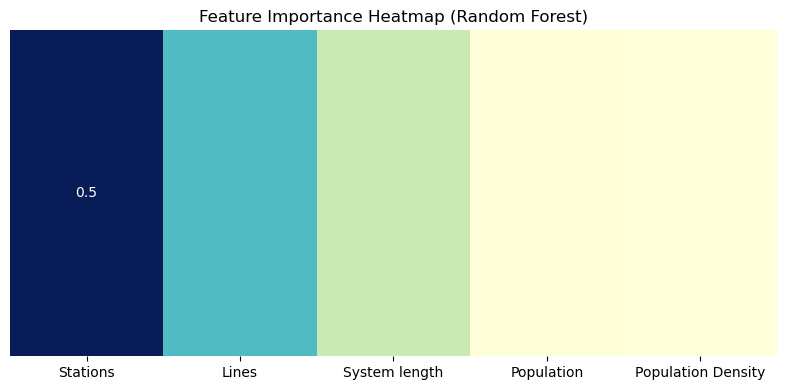

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your feature names (used during training)
feature_names = ['Population', 'Population Density', 'Stations', 'System length', 'Lines']

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(importance_df[['Importance']].T, 
            cmap='YlGnBu', 
            annot=True, 
            xticklabels=importance_df['Feature'],
            cbar=False)

plt.title('Feature Importance Heatmap (Random Forest)')
plt.yticks([])
plt.tight_layout()
plt.show()


C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


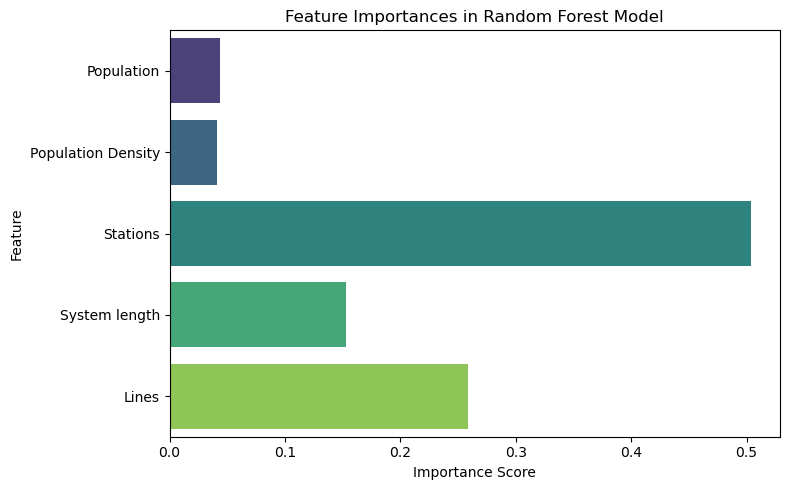

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = ['Population', 'Population Density', 'Stations', 'System length', 'Lines']

# Create barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


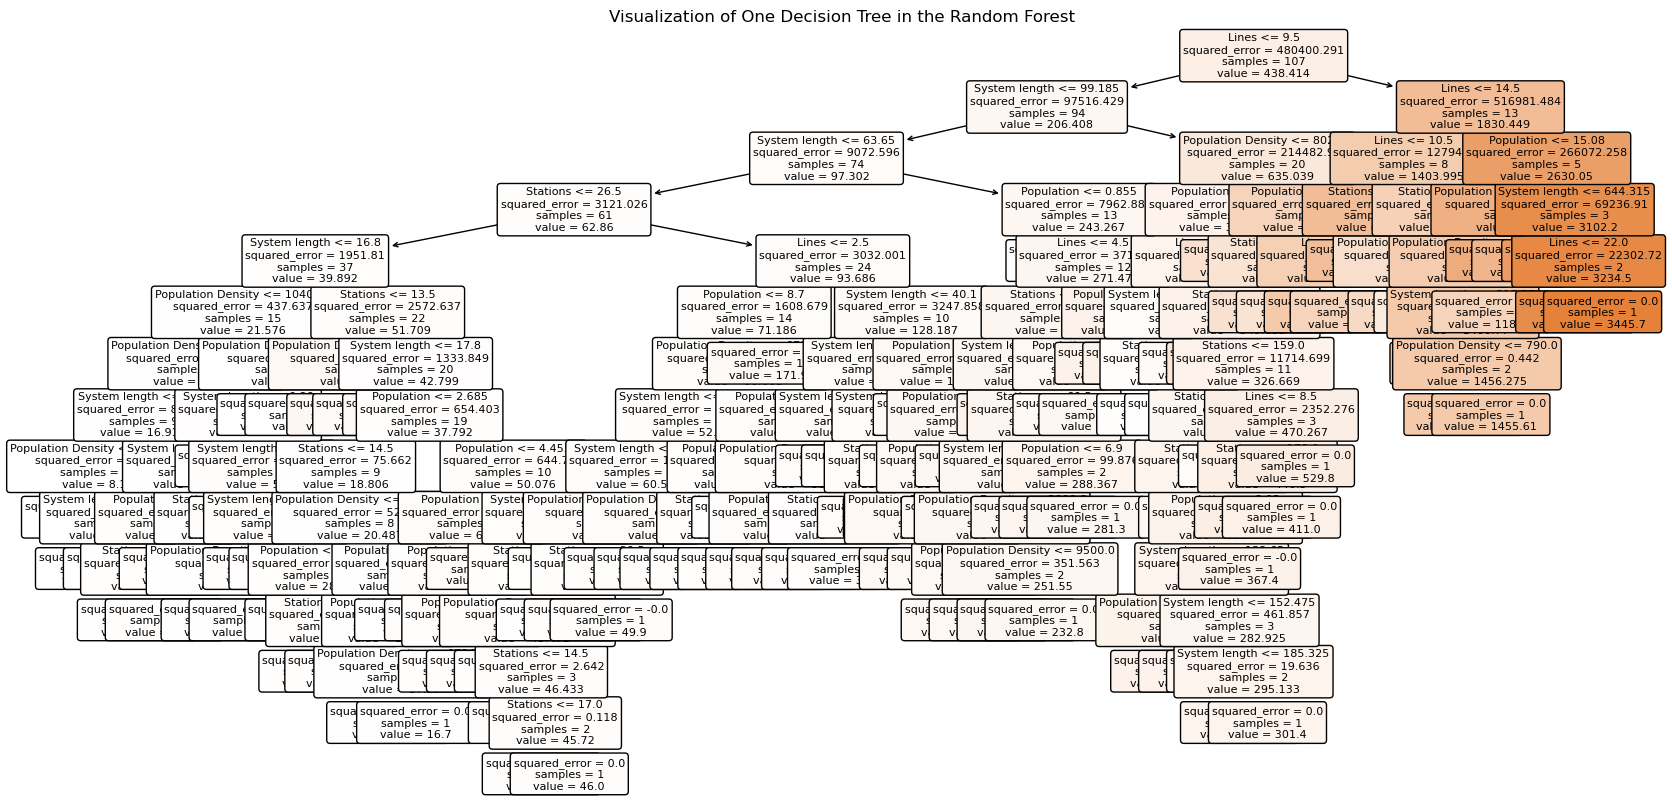

In [12]:
from sklearn.tree import plot_tree

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], 
          feature_names=feature_names, 
          filled=True, 
          rounded=True, 
          fontsize=8)
plt.title('Visualization of One Decision Tree in the Random Forest')
plt.show()
